<a href="https://colab.research.google.com/github/thiagocdn/Imersao-dados-Alura/blob/main/Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO", "NU_NOTA_TOTAL"]
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0")

In [94]:
provas_entrada = ["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()

notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[prova_saida]

In [95]:
notas_entrada.head()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0


In [96]:
X = notas_entrada
y = notas_saida

In [97]:
from sklearn.model_selection import train_test_split 

In [98]:
SEED = 4321

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)
X_train.head()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
90200,567.7,523.2,542.7,660.0
12375,497.1,423.0,445.2,580.0
46320,494.0,528.5,454.0,520.0
111208,561.9,572.7,385.8,640.0
75943,686.5,646.5,625.7,900.0


In [99]:
from sklearn.svm import LinearSVR

In [100]:
modelo = LinearSVR(random_state=SEED)

In [101]:
modelo.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [102]:
predictions = modelo.predict(X_test)

(-50.0, 1050.0)

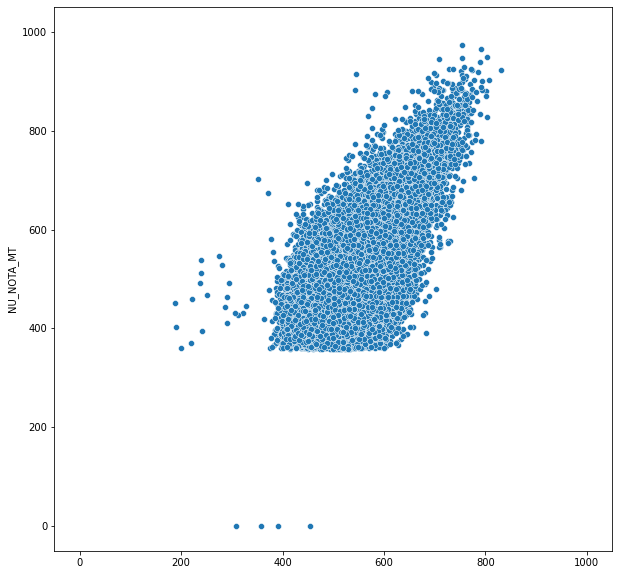

In [103]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=predictions, y=y_test)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

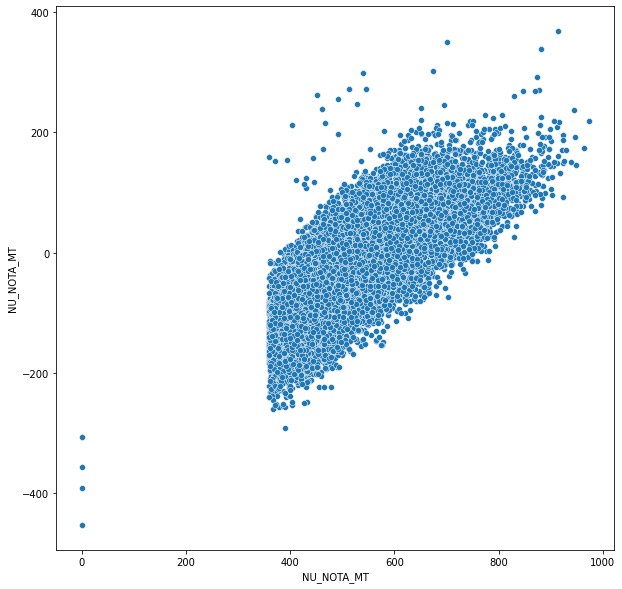

In [104]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_test-predictions)

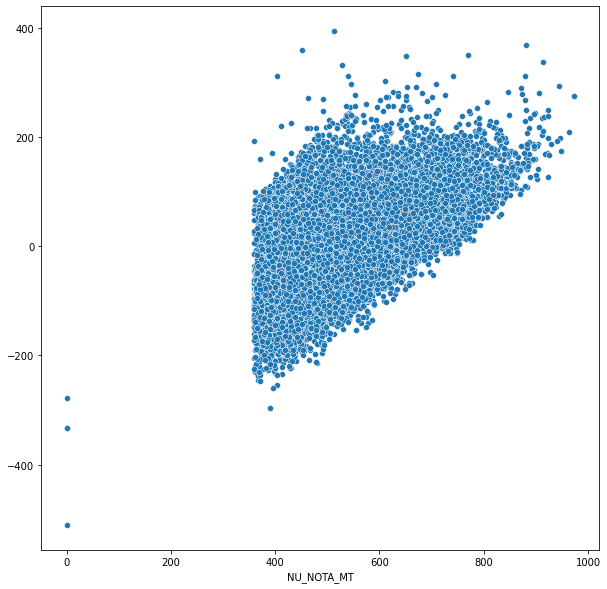

In [105]:
# DESAFIO 01: comparar a performance do modelo proposto pelo Thiago (a nota MT eh igual a media das demais notas) e do modelo criado acima...
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_test-X_test.mean(axis=1))

In [106]:
print(((y_test-predictions)**2).mean())
print(((y_test-X_test.mean(axis=1))**2).mean())
# A predictions ficou sensivelmente melhor que o proposto pelo Thiago

6604.415306219529
6700.949283472021


In [107]:
resultados = pd.DataFrame()
resultados["Real"] = y_test
resultados["Previsao"] = predictions
resultados["Diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["Quadrado_Diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [108]:
resultados

,Real,Previsao,Diferenca,Quadrado_Diferenca
114991,459.7,564.486105,-104.786105,10980.127878
104685,617.2,628.305027,-11.105027,123.321625
91028,520.0,509.980986,10.019014,100.380650
115802,703.8,593.681144,110.118856,12126.162420
93303,627.1,579.784588,47.315412,2238.748252
...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380
40159,479.1,652.313922,-173.213922,30003.062777
64083,501.4,607.787172,-106.387172,11318.230438
84661,772.5,734.227663,38.272337,1464.771772


In [109]:
resultados["Quadrado_Diferenca"].mean()

6604.415306219529

In [110]:
resultados["Quadrado_Diferenca"].mean()**(1/2)

81.26755383435341

In [111]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(X_train, y_train)
dummy_predictions = modelo_dummy.predict(X_test)

In [112]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, dummy_predictions)

12063.645588509502

In [113]:
mean_squared_error(y_test, predictions)

6604.41530621957

5961.372212400349


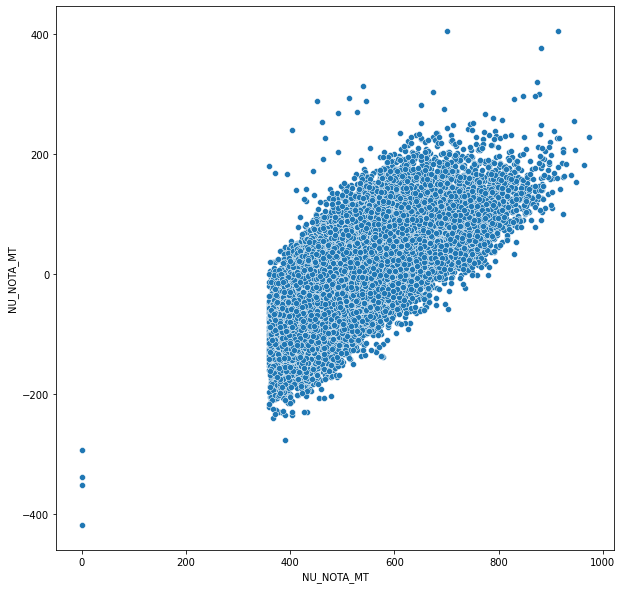

In [114]:
# DESAFIO 02: procurar outro algoritmo/modelo de ML e fazer o mesmo procedimento para comparar o resultado
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_predictions = linear.predict(X_test)
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_test-linear_predictions)
print(((y_test-linear_predictions)**2).mean())

In [115]:
# DESAFIO 03: Ler a documentacao do dummy e alterar o metodo de regressao
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor(strategy="quantile", quantile=0.5)
modelo_dummy.fit(X_train, y_train)
dummy_predictions = modelo_dummy.predict(X_test)
mean_squared_error(y_test, dummy_predictions)

12599.969971795981

In [116]:
# DESAFIO 04: Buscar outra metrica para avaliar o modelo de regressao
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions)**(1/2))

66.04555425503301
81.26755383435366
